## TVB-Framework command initialisation

In [2]:
from tvb.interfaces.command.lab import *
from tvb.adapters.creators.allen_creator import AllenConnectomeBuilder
from tvb.adapters.creators.allen_creator import AllenConnectModel
from tvb.core.adapters.abcadapter import ABCAdapter
from tvb.core.services.operation_service import OperationService

2021-05-10 17:17:22,008 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceDBIN'>
2021-05-10 17:17:22,010 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceDWEI'>
2021-05-10 17:17:22,011 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceNETW'>
2021-05-10 17:17:22,011 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceRDA'>
2021-05-10 17:17:22,012 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceRDM'>
2021-05-10 17:17:22,012 - WARNING - tvb.config.init.introspector_registr

In [3]:
#list_projects()

In [4]:
# builder_instance = ABCAdapter.build_adapter_from_class(AllenConnectomeBuilder)

# # The corresponding view_model is AllenConnectModel. You can either instantiate it directly or get it by calling
# # the get_view_model_class adapter function.
# view_model = builder_instance.get_view_model_class()()

# view_model.resolution = 100#100, 25,50
# view_model.weighting = 1
# view_model.inj_f_thresh = 0#1 seems to not be enough to capture Crus1 region
# view_model.vol_thresh= 1000#100000000 did not seem to be enough

# # This ID of a project needs to exists in Db, and it can be taken from the WebInterface:
# launched_operation = fire_operation(1, builder_instance, view_model)
# launched_operation

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/site-packages/tvb_framework-2.1-py3.7.egg/tvb/core/entities/file/files_update_manager.py", line 181, in run_all_updates
    file_paths = self._get_all_h5_paths()
  File "/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/site-packages/tvb_framework-2.1-py3.7.egg/tvb/core/entities/file/files_update_manager.py", line 230, in _get_all_h5_paths
    project_operations = os.listdir(project_full_path)
NotADirectoryError: [Errno 20] Not a directory: '/Users/jilmeier/TVB/PROJECTS/.DS_Store'



In [5]:
# launched_operation = wait_to_finish(launched_operation)
# launched_operation

At this point, your operation of Allen DB import should be running in the background.
If you launch TVB web GUI, and you go to Project -> Operations page, you should see the new operation running (state color BLUE).

When done, your results will be ready for inspection in TVB web GUI.
Do not close your computer until the operation has finished. If you do so, then relaunch after you restart. Downloaded files will not be lost, but found by the new operation.


In [6]:
#list_operation_results(launched_operation.id)

# find out how many regions we have here now

In [7]:
#path="/Users/jilmeier/TVB/PROJECTS/Default_Project/133/" #change to newest folder always

In [8]:
#conn = load_dt(33) #21 is newest #change to newest id of connectivity, 17 is the before newest
#con = connectivity.Connectivity.from_file(os.path.join(path,'Connectivity_bdff5157-6084-11eb-b66a-acde48001122.h5'))

In [9]:
#list_operation_results()
#cache

In [10]:
#conn.weights

In [11]:
#print(conn.region_labels)

In [12]:
#len(conn.weights)

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np
# plt.subplots()
# #cs=plt.imshow(np.log10(conn.weights), cmap='jet', aspect='equal', interpolation='none')
# cs=plt.imshow(conn.weights, cmap='jet', aspect='equal', interpolation='none')

# plt.title('Structural connectivity matrix', fontsize=20)
# axcb=plt.colorbar(cs)
# axcb.set_label('Log10(weights)', fontsize=20)

In [14]:
#conn.weights.size

In [15]:
#conn.weights.shape

In [16]:
#np.sum(conn.weights)

# start from here to do it all manually

In [17]:
#start from here to do it all manually
import os.path

import numpy
import numpy as np
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from tvb.adapters.datatypes.db.connectivity import ConnectivityIndex
from tvb.adapters.datatypes.db.region_mapping import RegionVolumeMappingIndex
from tvb.adapters.datatypes.db.structural import StructuralMRIIndex
from tvb.adapters.datatypes.db.volume import VolumeIndex
from tvb.basic.logger.builder import get_logger
from tvb.basic.neotraits.api import Float, Int
from tvb.core.adapters.abcadapter import ABCAdapterForm, ABCAdapter
from tvb.core.entities.storage import dao
from tvb.core.neocom import h5
from tvb.core.neotraits.forms import SelectField, FloatField
from tvb.core.neotraits.view_model import ViewModel
from tvb.datatypes.connectivity import Connectivity
from tvb.datatypes.region_mapping import RegionVolumeMapping
from tvb.datatypes.structural import StructuralMRI
from tvb.datatypes.volumes import Volume

LOGGER = get_logger(__name__)

builder_instance = ABCAdapter.build_adapter_from_class(AllenConnectomeBuilder)

# The corresponding view_model is AllenConnectModel. You can either instantiate it directly or get it by calling
# the get_view_model_class adapter function.
view_model = builder_instance.get_view_model_class()()


view_model.resolution = 100#100, 25,50
view_model.weighting = 1
view_model.inj_f_thresh = 1#1 seems to not be enough to capture Crus1 region
view_model.vol_thresh= 1000#100000000 did not seem to be enough


resolution = view_model.resolution
weighting = view_model.weighting
inj_f_thresh = view_model.inj_f_thresh / 100.
vol_thresh = view_model.vol_thresh

project = dao.get_project_by_id(1)
#manifest_file = 1.file_handler.get_allen_mouse_cache_folder(project.name)
#manifest_file = os.path.join(manifest_file, 'mouse_connectivity_manifest.json')
manifest_file = '/Users/jilmeier/TVB/PROJECTS/Default_Project/ALLEN_MOUSE_CONNECTIVITY_CACHE/mouse_connectivity_manifest.json'
cache = MouseConnectivityCache(resolution=resolution, manifest_file=manifest_file)

# the method creates a dictionary with information about which experiments need to be downloaded
def dictionary_builder(tvb_mcc, transgenic_line):
    # open up a list of all of the experiments
    all_experiments = tvb_mcc.get_experiments(dataframe=True, cre=transgenic_line)
    # build dict of injection structure id to experiment list
    ist2e = {}
    for eid in all_experiments.index:
        isti = all_experiments.loc[eid]['injection_structures']#['secondary_injection_structure']#['primary_injection_structure']
        for j in range(len(isti)):
            if isti[j] not in ist2e:
                ist2e[isti[j]] = []
            ist2e[isti[j]].append(eid)
    return ist2e
# this probably only lists all primary injection structures

        # the method creates a dictionary with information about which experiments need to be downloaded
ist2e = dictionary_builder(cache, False)

# the method downloads experiments necessary to build the connectivity
def download_an_construct_matrix(tvb_mcc, weighting, ist2e, transgenic_line):
    projmaps = {}
    if weighting == 3:  # download projection energy
        for isti, elist in ist2e.items():
            projmaps[isti] = tvb_mcc.get_projection_matrix(
                experiment_ids=elist,
                projection_structure_ids=list(ist2e),  # summary_structure_ids,
                parameter='projection_energy')
            LOGGER.info('injection site id', isti, ' has ', len(elist), ' experiments with pm shape ',
                        projmaps[isti]['matrix'].shape)
    else:  # download projection density:
        for isti, elist in ist2e.items():
            projmaps[isti] = tvb_mcc.get_projection_matrix(
                experiment_ids=elist,
                projection_structure_ids=list(ist2e),  # summary_structure_ids,
                parameter='projection_density')
            LOGGER.info('injection site id', isti, ' has ', len(elist), ' experiments with pm shape ',
                        projmaps[isti]['matrix'].shape)
        if weighting == 1:  # download injection density
            injdensity = {}
            all_experiments = tvb_mcc.get_experiments(dataframe=True, cre=transgenic_line)
            for exp_id in all_experiments['id']:
                inj_d = tvb_mcc.get_injection_density(exp_id, file_name=None)
                # all the experiments have only an injection sites (only 3 coordinates),
                # thus it is possible to sum the injection matrix
                injdensity[exp_id] = (np.sum(inj_d[0]) / np.count_nonzero(inj_d[0]))
                LOGGER.info('Experiment id', exp_id, ', the total injection density is ', injdensity[exp_id])
            # in this case projmaps will contain PD/ID
            for inj_id in range(len(list(projmaps.values()))):
                index = 0
                for exp_id in list(projmaps.values())[inj_id]['rows']:
                    list(projmaps.values())[inj_id]['matrix'][index] = list(projmaps.values())[inj_id]['matrix'][
                                                                           index] / \
                                                                       injdensity[exp_id]
                    index += 1
    return projmaps


        # the method downloads experiments necessary to build the connectivity
projmaps = download_an_construct_matrix(cache, weighting, ist2e, False)

In [18]:
#all_experiments = cache.get_experiments(dataframe=True, cre=False)

In [19]:
# ist2e = {}
# for eid in all_experiments.index:
#         isti = all_experiments.loc[eid]['injection_structures']#['secondary_injection_structure']#['primary_injection_structure']
#         #['injection_structures']
#         for j in range(len(isti))
#             if isti[j] not in ist2e:
#                 ist2e[isti] = []
#             ist2e[isti].append(eid)
#     return ist2e

In [20]:
#eid=272824561

In [21]:
#isti = all_experiments.loc[eid]['injection_structures']

In [22]:
#cc=range(len(isti))

In [23]:
# x = range(6)
# for n in x:
#   print(n)

In [24]:
#ist2e

In [25]:
#len(ist2e)

In [26]:
#projmaps

In [27]:
#projmaps.values()#['matrix']
#projmaps[104]['matrix'].shape

In [28]:
# grab the StructureTree instance
structure_tree = cache.get_structure_tree()

def create_file_order(projmaps, structure_tree):
    """
    the method creates file order and keyord that will be the link between the structural conn
    order and the id key in the Allen database
    """
    order = {}
    for index in range(len(projmaps)):
        target_id = list(projmaps.values())[0]['columns'][index]['structure_id']
        order[structure_tree.get_structures_by_id([target_id])[0]['graph_order']] = [target_id]
        order[structure_tree.get_structures_by_id([target_id])[0]['graph_order']].append(
            structure_tree.get_structures_by_id([target_id])[0]['name'])
    key_ord = list(order)
    key_ord.sort()
    return order, key_ord


# the method builds the Structural Connectivity (SC) matrix
def construct_structural_conn(projmaps, order, key_ord):
    len_right = len(list(projmaps))
    structural_conn = np.zeros((len_right, 2 * len_right), dtype=float)
    row = -1
    for graph_ord_inj in key_ord:
        row += 1
        inj_id = order[graph_ord_inj][0]
        target = projmaps[inj_id]['columns']
        matrix = projmaps[inj_id]['matrix']
        # average on the experiments (NB: if there are NaN values not average!)
        if np.isnan(np.sum(matrix)):
            matrix_temp = np.zeros((matrix.shape[1], 1), dtype=float)
            for i in range(matrix.shape[1]):
                if np.isnan(sum(matrix[:, i])):
                    occ = 0
                    for jj in range(matrix.shape[0]):
                        if matrix[jj, i] == matrix[jj, i]:  # since nan!=nan
                            occ += 1
                            matrix_temp[i, 0] = matrix_temp[i, 0] + matrix[jj, i]
                    matrix_temp[i, 0] = matrix_temp[i, 0] / occ
                else:
                    matrix_temp[i, 0] = sum(matrix[:, i]) / matrix.shape[0]
            matrix = matrix_temp
        else:
            matrix = (np.array([sum(matrix[:, i]) for i in range(matrix.shape[1])]) / (matrix.shape[0]))
        # order the target
        col = -1
        for graph_ord_targ in key_ord:
            col += 1
            targ_id = order[graph_ord_targ][0]
            for index in range(len(target)):
                if target[index]['structure_id'] == targ_id:
                    if target[index]['hemisphere_id'] == 2:
                        structural_conn[row, col] = matrix[index]
                    if target[index]['hemisphere_id'] == 1:
                        structural_conn[row, col + len_right] = matrix[index]
    # save the complete matrix (both left and right inj):
    first_quarter = structural_conn[:, :(structural_conn.shape[1] // 2)]
    second_quarter = structural_conn[:, (structural_conn.shape[1] // 2):]
    sc_down = np.concatenate((second_quarter, first_quarter), axis=1)
    structural_conn = np.concatenate((structural_conn, sc_down), axis=0)
    print(structural_conn)
    print(np.nanmax(structural_conn))
    structural_conn = structural_conn / (np.nanmax(structural_conn))  # normalize the matrix
    #there seem to be nan values in the matrix
    return structural_conn

# the method creates file order and keyword that will be the link between the SC order and the
        # id key in the Allen database
[order, key_ord] = create_file_order(projmaps, structure_tree)

        # the method builds the Structural Connectivity (SC) matrix
structural_conn = construct_structural_conn(projmaps, order, key_ord)

/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


[[8.87938851e-01 9.75781164e-02 2.90132195e-01 ... 4.01199752e-06
  5.73381857e-07 7.97251660e-05]
 [1.06585134e-01 2.72794052e-01 1.88649434e-01 ... 1.85368868e-04
  1.47835731e-04 1.30645649e-03]
 [2.48681043e-01 1.61203191e-01 2.18563696e-01 ... 8.78658640e-05
  1.22555162e-04 5.97514424e-04]
 ...
 [2.36762300e-06 8.00947771e-05 9.85459684e-05 ... 3.55966695e-01
  1.51747611e-01 1.13357346e-01]
 [2.36762300e-06 8.36829182e-05 1.03987575e-04 ... 2.94463569e-01
  2.30185681e-01 1.07782750e-01]
 [2.99608292e-04 8.15260767e-05 2.68405358e-05 ... 4.02031416e-02
  7.80084015e-03 7.96977223e-01]]
2.9326612772407197


In [29]:
structural_conn.shape
#structural_conn.shape[1] // 2
#first_quarter = structural_conn[:, :(structural_conn.shape[1] // 2)]
#second_quarter = structural_conn[:, (structural_conn.shape[1] // 2):]

#save the structural conn somewhere!

(596, 596)

In [30]:
#sc_down = np.concatenate((second_quarter, first_quarter), axis=1)
#sc_down
#structural_conn = np.concatenate((structural_conn, sc_down), axis=0)
#structural_conn
#structural_conn = structural_conn / (np.amax(structural_conn)) 
#structural_conn
#np.amax(structural_conn)

In [31]:
#len_right = len(list(projmaps))
#len_right
#structural_conn

In [32]:
#key_ord

In [33]:
#order

In [34]:
#len_right = len(list(projmaps))
#structural_conn = np.zeros((len_right, 2 * len_right), dtype=float)
#row = -1

In [35]:
#key_ord[0]

In [36]:
# graph_ord_inj = key_ord[0]
# #for graph_ord_inj in key_ord:
# row += 1
# inj_id = order[graph_ord_inj][0]
# target = projmaps[inj_id]['columns']
# matrix = projmaps[inj_id]['matrix']
#         # average on the experiments (NB: if there are NaN values not average!)
# #     if np.isnan(np.sum(matrix)):
# #         matrix_temp = np.zeros((matrix.shape[1], 1), dtype=float)
# #         for i in range(matrix.shape[1]):
# #             if np.isnan(sum(matrix[:, i])):
# #                     occ = 0
# #                     for jj in range(matrix.shape[0]):
# #                         if matrix[jj, i] == matrix[jj, i]:  # since nan!=nan
# #                             occ += 1
# #                             matrix_temp[i, 0] = matrix_temp[i, 0] + matrix[jj, i]
# #                     matrix_temp[i, 0] = matrix_temp[i, 0] / occ
# #             else:
# #                     matrix_temp[i, 0] = sum(matrix[:, i]) / matrix.shape[0]
# #             matrix = matrix_temp
# #         else:
# matrix = (np.array([sum(matrix[:, i]) for i in range(matrix.shape[1])]) / (matrix.shape[0]))
# #         # order the target
# col = -1
# graph_ord_targ=key_ord[0]
# #         for graph_ord_targ in key_ord:
# col += 1
# targ_id = order[graph_ord_targ][0]
# #for index in range(len(target)):
# index = 0
# if target[index]['structure_id'] == targ_id:
#     if target[index]['hemisphere_id'] == 2:
#         structural_conn[row, col] = matrix[index]
#     if target[index]['hemisphere_id'] == 1:
#         structural_conn[row, col + len_right] = matrix[index]
#     # save the complete matrix (both left and right inj):
# #     first_quarter = structural_conn[:, :(structural_conn.shape[1] // 2)]
# #     second_quarter = structural_conn[:, (structural_conn.shape[1] // 2):]
# #     sc_down = np.concatenate((second_quarter, first_quarter), axis=1)
# #     structural_conn = np.concatenate((structural_conn, sc_down), axis=0)
# #     structural_conn = structural_conn / (np.amax(structural_conn))  # normalize the matrix
# # #     #return structural_conn

In [37]:
# np.sum(matrix)
# np.isnan(np.sum(matrix))
# matrix.shape#[0]
# #range(matrix.shape[1])]) / (matrix.shape[0]))
# i=0
# targ_id
# len(key_ord)
# target
# structural_conn

In [38]:
#matrix

In [39]:
#len_right

In [40]:
#sum(structural_conn)

/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


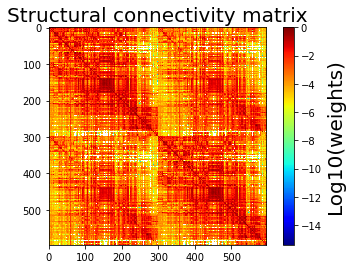

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplots()
#cs=plt.imshow(np.log10(conn.weights), cmap='jet', aspect='equal', interpolation='none')
cs=plt.imshow(np.log10(structural_conn), cmap='jet', aspect='equal', interpolation='none')

plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)

In [42]:
#structural_conn

In [43]:
#len(list(projmaps.values()))

In [44]:
# the method returns the coordinate of the centres and the name of the brain areas in the selected parcellation
# the method returns the centres of the brain areas in the selected parcellation
# the method rotate the Allen 3D (x1,y1,z1) reference in the TVB 3D reference (x2,y2,z2).
# the relation between the different reference system is: x1=z2, y1=x2, z1=y2
def rotate_reference(allen):
    # first rotation in order to obtain: x1=x2, y1=z2, z1=y2
    vol_trans = np.zeros((allen.shape[0], allen.shape[2], allen.shape[1]), dtype=int)
    for x in range(allen.shape[0]):
        vol_trans[x, :, :] = (allen[x, :, :][::-1]).transpose()

    # second rotation in order to obtain: x1=z2, y1=x1, z1=y2
    allen_rotate = np.zeros((allen.shape[2], allen.shape[0], allen.shape[1]), dtype=int)
    for y in range(allen.shape[1]):
        allen_rotate[:, :, y] = (vol_trans[:, :, y]).transpose()
    return allen_rotate

def construct_centres(tvb_mcc, order, key_ord):
    centres = np.zeros((len(key_ord) * 2, 3), dtype=float)
    names = []
    row = -1
    for graph_ord_inj in key_ord:
        node_id = order[graph_ord_inj][0]
        coord = [0, 0, 0]
        mask, _ = tvb_mcc.get_structure_mask(node_id)
        mask = rotate_reference(mask)
        mask_r = mask[:mask.shape[0] // 2, :, :]
        xyz = np.where(mask_r)
        if xyz[0].shape[0] > 0:  # Check if the area is in the annotation volume
            coord[0] = np.mean(xyz[0])
            coord[1] = np.mean(xyz[1])
            coord[2] = np.mean(xyz[2])
        row += 1
        centres[row, :] = coord
        coord[0] = (mask.shape[0]) - coord[0]
        centres[row + len(key_ord), :] = coord
        n = order[graph_ord_inj][1]
        right = 'Right '
        right += n
        right = str(right)
        names.append(right)
    for graph_ord_inj in key_ord:
        n = order[graph_ord_inj][1]
        left = 'Left '
        left += n
        left = str(left)
        names.append(left)
    return centres, names

[centres, names] = construct_centres(cache, order, key_ord)

In [45]:
# the method returns the tract lengths between the brain areas in the selected parcellation
def construct_tract_lengths(centres):
    len_right = len(centres) // 2
    tracts = np.zeros((len_right, len(centres)), dtype=float)
    for inj in range(len_right):
        center_inj = centres[inj]
        for targ in range(len_right):
            targ_r = centres[targ]
            targ_l = centres[targ + len_right]
            tracts[inj, targ] = np.sqrt(
                (center_inj[0] - targ_r[0]) ** 2 + (center_inj[1] - targ_r[1]) ** 2 + (center_inj[2] - targ_r[2]) ** 2)
            tracts[inj, targ + len_right] = np.sqrt(
                (center_inj[0] - targ_l[0]) ** 2 + (center_inj[1] - targ_l[1]) ** 2 + (center_inj[2] - targ_l[2]) ** 2)
    # Save the complete matrix (both left and right inj):
    first_quarter = tracts[:, :(tracts.shape[1] // 2)]
    second_quarter = tracts[:, (tracts.shape[1] // 2):]
    tracts_down = np.concatenate((second_quarter, first_quarter), axis=1)
    tracts = np.concatenate((tracts, tracts_down), axis=0)
    return tracts

# the method returns the tract lengths between the brain areas in the selected parcellation
tract_lengths = construct_tract_lengths(centres)

In [46]:
# the method associated the parent and the grandparents to the child in the selected parcellation with the biggest vol
# Since the parcellation is reduced some areas are in the annotation volume but not in the parcellation,
# so it is possible to plot also those areas with following trick:
# If an area that is not in the parcellation is brother of an area that is in the parcellation (same parent),
# the areas not in the parcellation will be plotted in the vol with the
# same vec_indexed of the area in the parcellation.
# In order to have an univocal relation, since some areas in the parcellation have some parent
# for each parent it will be link the child with the biggest volume in the parcellation
# the same is done for the grandparents
def parents_and_grandparents_finder(tvb_mcc, order, key_ord, structure_tree):
    parents = []  # Here it will be the id of the parents of the areas in the parcellation
    grandparents = []  # Here it will be the id of the grandparents of the areas in the parcellation
    vol_areas = []  # Here it will be the volume of the areas in the parcellation
    vec_index = []  # Here it will be the index of the vector of the areas in the parcellation
    index = 0
    for graph_ord_inj in key_ord:
        node_id = order[graph_ord_inj][0]
        parents.append(structure_tree.get_structures_by_id([node_id])[0]['structure_id_path'][-2])
        grandparents.append(structure_tree.get_structures_by_id([node_id])[0]['structure_id_path'][-3])
        vec_index.append(index)
        index += 1
        mask, _ = tvb_mcc.get_structure_mask(node_id)
        tot_voxels = np.count_nonzero(mask)
        vol_areas.append(tot_voxels)
    # I will order parents, grandparents, vec_index according to the volume of the areas
    parents = [parents for (vv, parents) in sorted(zip(vol_areas, parents))]
    grandparents = [grandparents for (vv, grandparents) in sorted(zip(vol_areas, grandparents))]
    vec_index = [iid for (vv, iid) in sorted(zip(vol_areas, vec_index))]
    k = len(parents)
    unique_parents = {}  # Unique parents will be a dictionary with keys the parent id and as value the index vec
    # of the region in parcellation which has that parent id
    for p in reversed(parents):
        k -= 1
        if p not in list(unique_parents):
            unique_parents[p] = vec_index[k]
    k = len(grandparents)
    unique_gradparents = {}  # Unique parents will be a dictionary with keys the parent id and as value the index vec
    # of the region in my parcellation that has that parent id
    for p in reversed(grandparents):
        k -= 1
        if np.isnan(p) == 0:
            if p not in list(unique_gradparents):
                unique_gradparents[p] = vec_index[k]
    return unique_parents, unique_gradparents


def mouse_brain_visualizer(vol, order, key_ord, unique_parents, unique_grandparents, structure_tree, projmaps):
    """
    the method returns a volume indexed between 0 and N-1, with N=tot brain areas in the parcellation.
    -1=background and areas that are not in the parcellation
    """
    tot_areas = len(key_ord) * 2
    indexed_vec = np.arange(tot_areas).reshape(tot_areas, )
    # vec indexed between 0 and (N-1), with N=total number of area in the parcellation
    indexed_vec = indexed_vec + 1  # vec indexed between 1 and N
    indexed_vec = indexed_vec * (10 ** (-(1 + int(np.log10(tot_areas)))))
    # vec indexed between 0 and 0,N (now all the entries of vec_indexed are < 1 in order to not create confusion
    # with the entry of Vol (always greater than 1)
    vol_r = vol[:, :, :(vol.shape[2] // 2)]
    vol_r = vol_r.astype(np.float64)
    vol_l = vol[:, :, (vol.shape[2] // 2):]
    vol_l = vol_l.astype(np.float64)
    index_vec = 0  # this is the index of the vector
    left = len(indexed_vec) // 2
    for graph_ord_inj in key_ord:
        node_id = order[graph_ord_inj][0]
        if node_id in vol_r:  # check if the area is in the annotation volume
            vol_r[vol_r == node_id] = indexed_vec[index_vec]
            vol_l[vol_l == node_id] = indexed_vec[index_vec + left]
        child = []
        for ii in range(len(structure_tree.children([node_id])[0])):
            child.append(structure_tree.children([node_id])[0][ii]['id'])
        while len(child) != 0:
            if (child[0] in vol_r) and (child[0] not in list(projmaps)):
                vol_r[vol_r == child[0]] = indexed_vec[index_vec]
                vol_l[vol_l == child[0]] = indexed_vec[index_vec + left]
            child.remove(child[0])
        index_vec += 1  # index of vector
    vol_parcel = np.concatenate((vol_r, vol_l), axis=2)
    # Since the parcellation is reduced some areas are in the annotation volume but not in the parcellation,
    # so it is possible to plot also those areas with trick explained in ParentsAndGrandPArentsFinder
    # Parents:
    bool_idx = (vol_parcel > np.amax(indexed_vec))
    # Find the elements of vol_parcel that are yet not associated to a value of the indexed_vec in the parcellation
    not_assigned = np.unique(vol_parcel[bool_idx])
    vol_r = vol_parcel[:, :, :(vol.shape[2] // 2)]
    vol_r = vol_r.astype(np.float64)
    vol_l = vol_parcel[:, :, (vol.shape[2] // 2):]
    vol_l = vol_l.astype(np.float64)

    for node_id in not_assigned:
        node_id = int(node_id)
        if structure_tree.get_structures_by_id([node_id])[0] is not None:
            ancestor = structure_tree.get_structures_by_id([node_id])[0]['structure_id_path']
        else:
            ancestor = []
        while len(ancestor) > 0:
            pp = ancestor[-1]
            if pp in list(unique_parents):
                vol_r[vol_r == node_id] = indexed_vec[unique_parents[pp]]
                vol_l[vol_l == node_id] = indexed_vec[unique_parents[pp] + left]
                ancestor = []
            else:
                ancestor.remove(pp)
    vol_parcel = np.concatenate((vol_r, vol_l), axis=2)
    # Grand parents:
    bool_idx = (vol_parcel > np.amax(indexed_vec))
    # Find the elements of vol_parcel that are yet not associated to a value of the indexed_vec in the parcellation
    not_assigned = np.unique(vol_parcel[bool_idx])
    vol_r = vol_parcel[:, :, :(vol.shape[2] // 2)]
    vol_r = vol_r.astype(np.float64)
    vol_l = vol_parcel[:, :, (vol.shape[2] // 2):]
    vol_l = vol_l.astype(np.float64)
    for node_id in not_assigned:
        node_id = int(node_id)
        if structure_tree.get_structures_by_id([node_id])[0] is not None:
            ancestor = structure_tree.get_structures_by_id([node_id])[0]['structure_id_path']
        else:
            ancestor = []
        while len(ancestor) > 0:
            pp = ancestor[-1]
            if pp in list(unique_grandparents):
                vol_r[vol_r == node_id] = indexed_vec[unique_grandparents[pp]]
                vol_l[vol_l == node_id] = indexed_vec[unique_grandparents[pp] + left]
                ancestor = []
            else:
                ancestor.remove(pp)
    vol_parcel = np.concatenate((vol_r, vol_l), axis=2)
    vol_parcel[vol_parcel >= 1] = 0  # set all the areas not in the parcellation to 0 since the background is zero
    vol_parcel = vol_parcel * (10 ** (1 + int(np.log10(tot_areas))))  # return to indexed between
    # 1 and N (with N=tot number of areas in the parcellation)
    vol_parcel = vol_parcel - 1  # with this operation background and areas not in parcellation will be -1
    # and all the others with the indexed between 0 and N-1
    vol_parcel = np.round(vol_parcel)
    vol_parcel = rotate_reference(vol_parcel)
    return vol_parcel


# download from the AllenSDK the annotation volume, the template volume
vol, annot_info = cache.get_annotation_volume()
template, template_info = cache.get_template_volume()

        # rotate template in the TVB 3D reference:
template = rotate_reference(template)
        
# the method associated the parent and the grandparents to the child in the selected parcellation with
        # the biggest volume
[unique_parents, unique_grandparents] = parents_and_grandparents_finder(cache, order, key_ord, structure_tree)

        # the method returns a volume indexed between 0 and N-1, with N=tot brain areas in the parcellation.
        # -1=background and areas that are not in the parcellation
vol_parcel = mouse_brain_visualizer(vol, order, key_ord, unique_parents, unique_grandparents,
                                            structure_tree, projmaps)

In [47]:
# results: Connectivity, Volume & RegionVolumeMapping
        # Connectivity
result_connectivity = Connectivity()
result_connectivity.centres = centres
result_connectivity.region_labels = numpy.array(names)
result_connectivity.weights = structural_conn
result_connectivity.tract_lengths = tract_lengths
result_connectivity.configure()
        # Volume
result_volume = Volume()
result_volume.origin = numpy.array([[0.0, 0.0, 0.0]])
result_volume.voxel_size = numpy.array([resolution, resolution, resolution])
        # result_volume.voxel_unit= micron
        # Region Volume Mapping
result_rvm = RegionVolumeMapping()
result_rvm.volume = result_volume
result_rvm.array_data = vol_parcel
result_rvm.connectivity = result_connectivity
result_rvm.title = "Volume mouse brain "
result_rvm.dimensions_labels = ["X", "Y", "Z"]
        # Volume template
result_template = StructuralMRI()
result_template.array_data = template
result_template.weighting = 'T1'
result_template.volume = result_volume
        
        
# result_connectivity = Connectivity()

# result_connectivity.centres = centres
# result_connectivity.region_labels = numpy.array(names)
# #result_connectivity.weights = structural_conn
# #result_connectivity.tract_lengths = tract_lengths
# #result_connectivity.configure()
# result_connectivity.region_labels

#save the structural conn matrix
storage_path='/Users/jilmeier/Documents/Rising_Net_Italians/connectome'
connectivity_index = h5.store_complete(result_connectivity, storage_path)
volume_index = h5.store_complete(result_volume, storage_path)
rvm_index = h5.store_complete(result_rvm, storage_path)
template_index = h5.store_complete(result_template, storage_path)

# This loads the just-prepared data:

In [48]:
# connectivity_path ='/Users/jilmeier/Documents/Rising_Net_Italians/connectome'
# import_op = import_conn_h5(1, connectivity_path)
# import_op = wait_to_finish(import_op)
# import_op
# #no idea how to load h5 files here...

## Summarize the major structures, except for the cerebellum

In [49]:
result_connectivity.weights
result_connectivity.region_labels
#do we have a list that identifies the major structures for each region

array(['Right Frontal pole, cerebral cortex', 'Right Primary motor area',
       'Right Secondary motor area',
       'Right Primary somatosensory area, nose',
       'Right Primary somatosensory area, barrel field',
       'Right Primary somatosensory area, lower limb',
       'Right Primary somatosensory area, mouth',
       'Right Primary somatosensory area, upper limb',
       'Right Primary somatosensory area, trunk',
       'Right Primary somatosensory area, unassigned',
       'Right Supplemental somatosensory area', 'Right Gustatory areas',
       'Right Visceral area', 'Right Dorsal auditory area',
       'Right Primary auditory area', 'Right Posterior auditory area',
       'Right Ventral auditory area', 'Right Anterolateral visual area',
       'Right Anteromedial visual area', 'Right Lateral visual area',
       'Right Primary visual area', 'Right Posterolateral visual area',
       'Right posteromedial visual area', 'Right Laterointermediate area',
       'Right Postrhinal

In [50]:
#pip install xlrd
import sys
!{sys.executable} -m pip install xlrd

In [53]:
# from platform import python_version

# print(python_version())

In [54]:
import xlrd
sheet_data = []   
wb = xlrd.open_workbook('/Users/jilmeier/Documents/Rising_Net_Italians/oh_table1.xls')
p = wb.sheet_names()
#p[1]
#for y in p:
sh = wb.sheet_by_name(p[1])
sh
for rownum in range(sh.nrows):
    sheet_data.append((sh.row_values(rownum)))

found_list = []
rows_to_be_saved = []
regions_missing = []
cc=0

for j in result_connectivity.region_labels: #go over the region labels
    j=j.split(" ",1)[1]
    #let us get rid of the left or right
    a=len(found_list)
    for i in sheet_data:
        if i[3] == j: #or i[2] == "string2" or i[2] == "string3" or i[2] == "string4" or i[2] == "string5":
            found_list.append(i[4])
        else:
            rows_to_be_saved.append(i)
    
    b=len(found_list)
    if a == b:
        regions_missing.append(j)
        found_list.append('X')
        print(a,b)
    
    b=len(found_list)
    cc+=1
    if b != cc:
        print(b,cc)
        
# text_file = open("Output.txt", "w")
# text_file.write(found_list)
# text_file.close()

In [55]:
# j=result_connectivity.region_labels[107]
# j=j.split(" ",1)[1]
# print(j)
# print(sheet_data[304][3])
# print(sheet_data[304][3]==j)
# sheet_data[295][3]
# # for i in sheet_data:
# #         if i[3] == j: #or i[2] == "string2" or i[2] == "string3" or i[2] == "string4" or i[2] == "string5":
# #             found_list.append(i[4])
# #         else:
# #             rows_to_be_saved.append(i)

In [56]:
regions_missing

[]

In [57]:
# found_list = []
# rows_to_be_saved = []
# regions_missing = []
# j=result_connectivity.region_labels[101]
# j
# # for j in result_connectivity.region_labels: #go over the region labels
# #     #let us get rid of the left or right
# a=len(found_list)
# a
# j=j.split(" ",1)[1]
# for i in sheet_data:
#     if i[3] == j: #or i[2] == "string2" or i[2] == "string3" or i[2] == "string4" or i[2] == "string5":
#         found_list.append(i[4])
#         print(i[3])
#     else:
#         rows_to_be_saved.append(i)
    
# # b=len(found_list)
# # if a == b:
# #     regions_missing.append(j)
# #     found_list.append('X')
# #     print(a,b)
# # #         #print('X')
# found_list
# # #a == b
# # a
# # i in sheet_data
# # i
# #i[3]
# j_new[1]
len(found_list)

596

In [58]:
#j[5:]
# result_connectivity.region_labels[595]
# #len(found_list)-596
# #295*2
# #rows_to_be_saved
# #regions_missing
# #len(result_connectivity.region_labels)
# found_list[595]
# i=numpy.unique(found_list)[13]
# i == found_list[595]
# #i
#i
numpy.unique(found_list)
# unique
# counts
# #which_major
# #enumerate(which_major)
# #which_major[595]
# sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]

array(['Cerebellar Cortex', 'Cerebellar Nuclei', 'Cortical Subplate',
       'Hippocampal Formation', 'Hypothalamus', 'Isocortex', 'Medulla',
       'Midbrain', 'Olfactory Areas', 'Pallidum', 'Pons', 'Striatum',
       'Thalamus'], dtype='<U21')

Let us summarize all the other regions where we already know their major structure

In [59]:
sum_conn=result_connectivity.weights
q=0
sum_conn_new= numpy.zeros((47,47)) #one more cerebellar nuclei region --> 36 regions cerebellum (right and left) + 11 major structures
which_major=numpy.zeros(596)
for i in numpy.unique(found_list):
    #print(i)
    for j in range(len(found_list)): #over all regions
        if i == found_list[j]: #then this region belongs to this major structure
            #print(i,found_list[j])
            which_major[j]=q #.append(q) #a list giving every region its number belonging to the major structure
            #print(which_major)
    q+=1
    
unique, counts = numpy.unique(which_major, return_counts=True)
sum_conn_new[0:sum(counts[0:2])][:,0:sum(counts[0:2])]=sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]
#sum_conn[0:sum(counts[0:2])][:,0:sum(counts[0:2])]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there , change this to include the X's
    for reg in range(sum(counts[0:2])):
        sum_conn_new[sum(counts[0:2])+k,reg]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)],reg])
        sum_conn_new[reg,sum(counts[0:2])+k]=numpy.sum(sum_conn[reg,[i for i,x in enumerate(which_major) if x==(k+2)]])
    for l in range(k+1,(len(unique)-2)): #with all other major structure
        sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
        sum_conn_new[sum(counts[0:2])+l,sum(counts[0:2])+k]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(l+2)]][:,[i for i,x in enumerate(which_major) if x==(k+2)]])
#now still to fill major structures among each other #11x11 matrix
#put diagonal to zero
for jj in range(47):
    sum_conn_new[jj,jj]=0


In [60]:
# unique, counts = numpy.unique(which_major, return_counts=True)
# unique
# counts
# len(unique)

In [61]:
#result_connectivity.region_labels[[i for i,x in enumerate(which_major) if x==12]] #this lists the regions that have no major structure assigned yet

#[i for i,x in enumerate(which_major) if x==13]#] #this lists the regions that have no major structure assigned yet
#for count, value in enumerate(which_major) if value==1
#    print(count, value)

In [62]:
#list all the regions that we already included in the current connectome (just without the X regions)
#result_connectivity.region_labels[[i for i,x in enumerate(which_major) if x < 13]] 

/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10


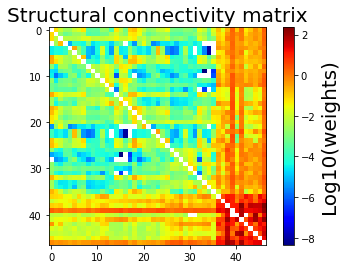

In [63]:
#len(sum_conn)
# reg
# #len(sum_conn_new[1])
# #major_str[0]
# len(which_major)
# numpy.unique(found_list)
# unique, counts = numpy.unique(which_major, return_counts=True)
# counts
# #sum(counts[0:2])
#sum_conn_new
#len(sum_conn_new[0:sum(counts[0:2])][0:sum(counts[0:2])])    
# #len(unique)
#len(sum_conn_new)
#z=range(3)
#print(z)
#k=0
#l=1
# #for k in range(0,(len(unique)-3)): #11 major other structures are out there  
# #    for reg in range(sum(counts[0:2])):
# reg = 0
# #sum_conn_new[sum(counts[0:2])+k,reg]=
# numpy.sum(sum_conn[np.nonzero(which_major == (k+2)),reg])
#         #sum_conn_new[reg][sum(counts[0:2])+k]=numpy.sum(sum_conn[[reg][which_major == (k+2)]])
# np.where(which_major == (k+2))
# [i for i,x in enumerate(which_major) if x==(k+2)] # => [1, 3]
# #which_major
# #k
# # a = np.array([[1,2], [3,4]])
# # a.shape
# # Out[6]: (2, 2)
# # np.where(a==2)
# # Out[7]: (array([0]), array([1]))
# # np.where(a==2)[0]
# # Out[8]: array([0])
# #enumerate(which_major)
#sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=
#numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
        
    
plt.subplots()
#cs=plt.imshow(np.log10(conn.weights), cmap='jet', aspect='equal', interpolation='none')
cs=plt.imshow(np.log10(sum_conn_new), cmap='jet', aspect='equal', interpolation='none')

plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)

In [64]:
#save this matrix
# results: Connectivity, Volume & RegionVolumeMapping
        # Connectivity
result_connectivity_sum = Connectivity()
#average over all centres in this major region
centres_sum=numpy.zeros((47,3))
centres_sum[0:sum(counts[0:2])]=centres[[i for i,x in enumerate(which_major) if x < 2]]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    centres_sum[sum(counts[0:2])+k]=numpy.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
result_connectivity_sum.centres = centres_sum

names_sum=[]#numpy.zeros((45))
indices=[i for i,x in enumerate(which_major) if x < 2]
new=numpy.array(names)

names_sum[0:sum(counts[0:2])]=new[indices]
nn=numpy.unique(found_list)
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    names_sum.append(nn[k+2])
    
# #put in names of major structures
result_connectivity_sum.region_labels = numpy.array(names)
result_connectivity_sum.weights = sum_conn_new
#calculate new tract lengths based on new centres
tract_lengths_sum = construct_tract_lengths(centres_sum)
result_connectivity_sum.tract_lengths = tract_lengths_sum
result_connectivity_sum.configure()
#         # Volume
#     #maybe we do not need volume
# # result_volume = Volume()
# # result_volume.origin = numpy.array([[0.0, 0.0, 0.0]])
# # result_volume.voxel_size = numpy.array([resolution, resolution, resolution])
#         # result_volume.voxel_unit= micron
#         # Region Volume Mapping
# # result_rvm = RegionVolumeMapping()
# # result_rvm.volume = result_volume
# # result_rvm.array_data = vol_parcel
# # result_rvm.connectivity = result_connectivity
# # result_rvm.title = "Volume mouse brain "
# # result_rvm.dimensions_labels = ["X", "Y", "Z"]
# #         # Volume template
# # result_template = StructuralMRI()
# # result_template.array_data = template
# # result_template.weighting = 'T1'
# # result_template.volume = result_volume
        
        
# # result_connectivity = Connectivity()

# # result_connectivity.centres = centres
# # result_connectivity.region_labels = numpy.array(names)
# # #result_connectivity.weights = structural_conn
# # #result_connectivity.tract_lengths = tract_lengths
# # #result_connectivity.configure()
# # result_connectivity.region_labels

#save the structural conn matrix
storage_path='/Users/jilmeier/Documents/Rising_Net_Italians/summarized_connectome'
connectivity_index = h5.store_complete(result_connectivity, storage_path)
#volume_index = h5.store_complete(result_volume, storage_path)
#rvm_index = h5.store_complete(result_rvm, storage_path)
#template_index = h5.store_complete(result_template, storage_path)

In [65]:
#centres.shape
# centres_sum=numpy.zeros((45,3))
# centres_sum[0:sum(counts[0:2])]=centres[0:sum(counts[0:2])]  
# for k in range(0,(len(unique)-3)): #11 major other structures are out there  
#     centres_sum[sum(counts[0:2])+k]=numpy.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
# #k=0
#centres_sum
names_sum
#numpy.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
#names[[i for i,x in enumerate(which_major) if x < 2]]

['Right Lingula (I)',
 'Right Central lobule',
 'Right Culmen',
 'Right Declive (VI)',
 'Right Folium-tuber vermis (VII)',
 'Right Pyramus (VIII)',
 'Right Uvula (IX)',
 'Right Nodulus (X)',
 'Right Simple lobule',
 'Right Ansiform lobule',
 'Right Paramedian lobule',
 'Right Copula pyramidis',
 'Right Paraflocculus',
 'Right Flocculus',
 'Right Fastigial nucleus',
 'Right Interposed nucleus',
 'Right Dentate nucleus',
 'Right Vestibulocerebellar nucleus',
 'Left Lingula (I)',
 'Left Central lobule',
 'Left Culmen',
 'Left Declive (VI)',
 'Left Folium-tuber vermis (VII)',
 'Left Pyramus (VIII)',
 'Left Uvula (IX)',
 'Left Nodulus (X)',
 'Left Simple lobule',
 'Left Ansiform lobule',
 'Left Paramedian lobule',
 'Left Copula pyramidis',
 'Left Paraflocculus',
 'Left Flocculus',
 'Left Fastigial nucleus',
 'Left Interposed nucleus',
 'Left Dentate nucleus',
 'Left Vestibulocerebellar nucleus',
 'Cortical Subplate',
 'Hippocampal Formation',
 'Hypothalamus',
 'Isocortex',
 'Medulla',
 'Mid

In [66]:
result_connectivity_sum.weights[2,1]
connectivity_index

<DataType(None, fa48809a54f940ad889fcc6b61008411, ConnectivityIndex, tvb.adapters.datatypes.db.connectivity, , , None, , , , , )>

Now let us take out the Inferior olivary complex from the medulla in order to have it also as a spiking region:

In [70]:
numpy.unique(found_list)

array(['Cerebellar Cortex', 'Cerebellar Nuclei', 'Cortical Subplate',
       'Hippocampal Formation', 'Hypothalamus', 'Isocortex', 'Medulla',
       'Midbrain', 'Olfactory Areas', 'Pallidum', 'Pons', 'Striatum',
       'Thalamus'], dtype='<U21')

In [71]:
which_major #medulla is 6

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  7

In [88]:
counts #78 regions in medulla
#if 'inferior_olivary_complex' in result_connectivity.region_labels
matching = [s for s in result_connectivity.region_labels if "Inferior olivary complex" in s]
matching
#result_connectivity.region_labels.index("Inferior olivary complex")
indiol=numpy.where(result_connectivity.region_labels == "Right Inferior olivary complex")
indior= numpy.where(result_connectivity.region_labels == "Left Inferior olivary complex")
which_major[indiol]

array([6.])

In [116]:
sum_conn=result_connectivity.weights
q=0
sum_conn_new= numpy.zeros((49,49)) #one more cerebellar nuclei region --> 36 regions cerebellum (right and left) + 11 major structures
which_major=numpy.zeros(596)
for i in numpy.unique(found_list):
    #print(i)
    for j in range(len(found_list)): #over all regions
        if i == found_list[j]: #then this region belongs to this major structure
            #print(i,found_list[j])
            which_major[j]=q #.append(q) #a list giving every region its number belonging to the major structure
            #print(which_major)
    q+=1

# let us treat inferior olive as one of the cerebellar regions, therefore we will now manipulate the major region to cerebellum
which_major[indiol]=0
which_major[indior]=0


unique, counts = numpy.unique(which_major, return_counts=True)
sum_conn_new[0:sum(counts[0:2])][:,0:sum(counts[0:2])]=sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]
#alright the above line puts the inside-cerebellar connections in the new connectome
#sum_conn[0:sum(counts[0:2])][:,0:sum(counts[0:2])]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there , change this to include the X's
    for reg in range(sum(counts[0:2])):
        sum_conn_new[sum(counts[0:2])+k,reg]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)],reg])
        sum_conn_new[reg,sum(counts[0:2])+k]=numpy.sum(sum_conn[reg,[i for i,x in enumerate(which_major) if x==(k+2)]])
    for l in range(k+1,(len(unique)-2)): #with all other major structure
        sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
        sum_conn_new[sum(counts[0:2])+l,sum(counts[0:2])+k]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(l+2)]][:,[i for i,x in enumerate(which_major) if x==(k+2)]])
#now still to fill major structures among each other #11x11 matrix
#put diagonal to zero
for jj in range(49):
    sum_conn_new[jj,jj]=0


/Applications/tvb-2.1a1.app/Contents/Resources/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


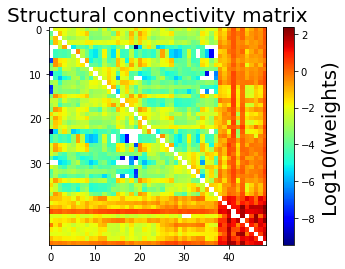

In [118]:
# sum(counts[0:2])
# k
# reg
# l
# #numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
# #sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=numpy.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])

# sum(counts[0:2])+k
# sum(counts[0:2])+l
# sum_conn_new[38,47]
# len(unique)-2
# unique
# l
# sum(counts[0:2])
plt.subplots()
#cs=plt.imshow(np.log10(conn.weights), cmap='jet', aspect='equal', interpolation='none')
cs=plt.imshow(np.log10(sum_conn_new), cmap='jet', aspect='equal', interpolation='none')

plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)

In [119]:
#save this matrix
# results: Connectivity, Volume & RegionVolumeMapping
        # Connectivity
result_connectivity_sum = Connectivity()
#average over all centres in this major region
centres_sum=numpy.zeros((49,3))
centres_sum[0:sum(counts[0:2])]=centres[[i for i,x in enumerate(which_major) if x < 2]]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    centres_sum[sum(counts[0:2])+k]=numpy.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
result_connectivity_sum.centres = centres_sum

names_sum=[]#numpy.zeros((45))
indices=[i for i,x in enumerate(which_major) if x < 2]
new=numpy.array(names)

names_sum[0:sum(counts[0:2])]=new[indices]
nn=numpy.unique(found_list)
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    names_sum.append(nn[k+2])
    
# #put in names of major structures
result_connectivity_sum.region_labels = numpy.array(names)
result_connectivity_sum.weights = sum_conn_new
#calculate new tract lengths based on new centres
tract_lengths_sum = construct_tract_lengths(centres_sum)
result_connectivity_sum.tract_lengths = tract_lengths_sum
result_connectivity_sum.configure()
#         # Volume
#     #maybe we do not need volume
# # result_volume = Volume()
# # result_volume.origin = numpy.array([[0.0, 0.0, 0.0]])
# # result_volume.voxel_size = numpy.array([resolution, resolution, resolution])
#         # result_volume.voxel_unit= micron
#         # Region Volume Mapping
# # result_rvm = RegionVolumeMapping()
# # result_rvm.volume = result_volume
# # result_rvm.array_data = vol_parcel
# # result_rvm.connectivity = result_connectivity
# # result_rvm.title = "Volume mouse brain "
# # result_rvm.dimensions_labels = ["X", "Y", "Z"]
# #         # Volume template
# # result_template = StructuralMRI()
# # result_template.array_data = template
# # result_template.weighting = 'T1'
# # result_template.volume = result_volume
        
        
# # result_connectivity = Connectivity()

# # result_connectivity.centres = centres
# # result_connectivity.region_labels = numpy.array(names)
# # #result_connectivity.weights = structural_conn
# # #result_connectivity.tract_lengths = tract_lengths
# # #result_connectivity.configure()
# # result_connectivity.region_labels

#save the structural conn matrix
storage_path='/Users/jilmeier/Documents/Rising_Net_Italians/summarized_connectome'
connectivity_index = h5.store_complete(result_connectivity, storage_path)
#volume_index = h5.store_complete(result_volume, storage_path)
#rvm_index = h5.store_complete(result_rvm, storage_path)
#template_index = h5.store_complete(result_template, storage_path)

In [120]:
names_sum

['Right Inferior olivary complex',
 'Right Lingula (I)',
 'Right Central lobule',
 'Right Culmen',
 'Right Declive (VI)',
 'Right Folium-tuber vermis (VII)',
 'Right Pyramus (VIII)',
 'Right Uvula (IX)',
 'Right Nodulus (X)',
 'Right Simple lobule',
 'Right Ansiform lobule',
 'Right Paramedian lobule',
 'Right Copula pyramidis',
 'Right Paraflocculus',
 'Right Flocculus',
 'Right Fastigial nucleus',
 'Right Interposed nucleus',
 'Right Dentate nucleus',
 'Right Vestibulocerebellar nucleus',
 'Left Inferior olivary complex',
 'Left Lingula (I)',
 'Left Central lobule',
 'Left Culmen',
 'Left Declive (VI)',
 'Left Folium-tuber vermis (VII)',
 'Left Pyramus (VIII)',
 'Left Uvula (IX)',
 'Left Nodulus (X)',
 'Left Simple lobule',
 'Left Ansiform lobule',
 'Left Paramedian lobule',
 'Left Copula pyramidis',
 'Left Paraflocculus',
 'Left Flocculus',
 'Left Fastigial nucleus',
 'Left Interposed nucleus',
 'Left Dentate nucleus',
 'Left Vestibulocerebellar nucleus',
 'Cortical Subplate',
 'Hip

I just put all the old code here from the Melozzi et al. paper

In [ ]:
# import os.path

# import numpy
# import numpy as np
# from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
# from tvb.adapters.datatypes.db.connectivity import ConnectivityIndex
# from tvb.adapters.datatypes.db.region_mapping import RegionVolumeMappingIndex
# from tvb.adapters.datatypes.db.structural import StructuralMRIIndex
# from tvb.adapters.datatypes.db.volume import VolumeIndex
# from tvb.basic.logger.builder import get_logger
# from tvb.basic.neotraits.api import Float, Int
# from tvb.core.adapters.abcadapter import ABCAdapterForm, ABCAdapter
# from tvb.core.entities.storage import dao
# from tvb.core.neocom import h5
# from tvb.core.neotraits.forms import SelectField, FloatField
# from tvb.core.neotraits.view_model import ViewModel
# from tvb.datatypes.connectivity import Connectivity
# from tvb.datatypes.region_mapping import RegionVolumeMapping
# from tvb.datatypes.structural import StructuralMRI
# from tvb.datatypes.volumes import Volume

# LOGGER = get_logger(__name__)

# RESOLUTION_OPTIONS = {
#     '25': 25,
#     '50': 50,
#     '100': 100
# }

# WEIGHTS_OPTIONS = {
#     '(projection density)/(injection density)': 1,
#     'projection density': 2,
#     'projection energy': 3
# }


# class AllenConnectModel(ViewModel):
#     resolution = Int(
#         label="Spatial resolution (micron)",
#         default=list(RESOLUTION_OPTIONS.values())[2],
#         choices=RESOLUTION_OPTIONS.values(),
#         required=True,
#         doc="""Definition of the weights of the connectivity :""")

#     weighting = Int(
#         label="Definition of the weights of the connectivity :",
#         default=list(WEIGHTS_OPTIONS.values())[0],
#         choices=WEIGHTS_OPTIONS.values(),
#         required=True,
#         doc="""""")

#     inj_f_thresh = Float(
#         label="Injected percentage of voxels in the inj site",
#         default=80,
#         required=True,
#         doc="""To build the volume and the connectivity select only the areas that have a volume 
#         greater than (micron^3): """)

#     vol_thresh = Float(
#         label="Min volume",
#         default=1000000000,
#         required=True,
#         doc="""To build the connectivity select only the experiment where the percentage of infected voxels 
#         in the injection structure is greater than: """)


# class AllenConnectomeBuilderForm(ABCAdapterForm):

#     def __init__(self):
#         super(AllenConnectomeBuilderForm, self).__init__()
#         self.resolution = SelectField(AllenConnectModel.resolution, choices=RESOLUTION_OPTIONS)
#         self.weighting = SelectField(AllenConnectModel.weighting, choices=WEIGHTS_OPTIONS)
#         self.inj_f_thresh = FloatField(AllenConnectModel.inj_f_thresh)
#         self.vol_thresh = FloatField(AllenConnectModel.vol_thresh)

#     @staticmethod
#     def get_view_model():
#         return AllenConnectModel

#     @staticmethod
#     def get_required_datatype():
#         return None

#     @staticmethod
#     def get_filters():
#         return None

#     @staticmethod
#     def get_input_name():
#         return None


# class AllenConnectomeBuilder(ABCAdapter):
#     """Handler for uploading a mouse connectivity from Allen dataset using AllenSDK."""

#     _ui_name = "Allen connectivity builder"
#     _ui_description = "Import mouse connectivity from Allen database (tracer experiments)"

#     def get_form_class(self):
#         return AllenConnectomeBuilderForm

#     def get_output(self):
#         return [ConnectivityIndex, VolumeIndex, RegionVolumeMappingIndex, StructuralMRIIndex]

#     def launch(self, view_model):
#         resolution = view_model.resolution
#         weighting = view_model.weighting
#         inj_f_thresh = view_model.inj_f_thresh / 100.
#         vol_thresh = view_model.vol_thresh

#         project = dao.get_project_by_id(self.current_project_id)
#         manifest_file = self.file_handler.get_allen_mouse_cache_folder(project.name)
#         manifest_file = os.path.join(manifest_file, 'mouse_connectivity_manifest.json')
#         cache = MouseConnectivityCache(resolution=resolution, manifest_file=manifest_file)

#         # the method creates a dictionary with information about which experiments need to be downloaded
#         ist2e = dictionary_builder(cache, False)

#         # the method downloads experiments necessary to build the connectivity
#         projmaps = download_an_construct_matrix(cache, weighting, ist2e, False)

#         # the method cleans the file projmaps in 4 steps
#         #projmaps = pms_cleaner(projmaps)

#         # download from the AllenSDK the annotation volume, the template volume
#         vol, annot_info = cache.get_annotation_volume()
#         template, template_info = cache.get_template_volume()

#         # rotate template in the TVB 3D reference:
#         template = rotate_reference(template)

#         # grab the StructureTree instance
#         structure_tree = cache.get_structure_tree()

#         # the method includes in the parcellation only brain regions whose volume is greater than vol_thresh
#         projmaps = areas_volume_threshold(cache, projmaps, vol_thresh, resolution)

#         # the method exclude from the experimental dataset
#         # those exps where the injected fraction of pixel in the injection site is lower than than the inj_f_thr 
#         projmaps = infected_threshold(cache, projmaps, inj_f_thresh)

#         # the method creates file order and keyword that will be the link between the SC order and the
#         # id key in the Allen database
#         [order, key_ord] = create_file_order(projmaps, structure_tree)

#         # the method builds the Structural Connectivity (SC) matrix
#         structural_conn = construct_structural_conn(projmaps, order, key_ord)

#         # the method returns the coordinate of the centres and the name of the brain areas in the selected parcellation
#         [centres, names] = construct_centres(cache, order, key_ord)

#         # the method returns the tract lengths between the brain areas in the selected parcellation
#         tract_lengths = construct_tract_lengths(centres)

#         # the method associated the parent and the grandparents to the child in the selected parcellation with
#         # the biggest volume
#         [unique_parents, unique_grandparents] = parents_and_grandparents_finder(cache, order, key_ord, structure_tree)

#         # the method returns a volume indexed between 0 and N-1, with N=tot brain areas in the parcellation.
#         # -1=background and areas that are not in the parcellation
#         vol_parcel = mouse_brain_visualizer(vol, order, key_ord, unique_parents, unique_grandparents,
#                                             structure_tree, projmaps)

#         # results: Connectivity, Volume & RegionVolumeMapping
#         # Connectivity
#         result_connectivity = Connectivity()
#         result_connectivity.centres = centres
#         result_connectivity.region_labels = numpy.array(names)
#         result_connectivity.weights = structural_conn
#         result_connectivity.tract_lengths = tract_lengths
#         result_connectivity.configure()
#         # Volume
#         result_volume = Volume()
#         result_volume.origin = numpy.array([[0.0, 0.0, 0.0]])
#         result_volume.voxel_size = numpy.array([resolution, resolution, resolution])
#         # result_volume.voxel_unit= micron
#         # Region Volume Mapping
#         result_rvm = RegionVolumeMapping()
#         result_rvm.volume = result_volume
#         result_rvm.array_data = vol_parcel
#         result_rvm.connectivity = result_connectivity
#         result_rvm.title = "Volume mouse brain "
#         result_rvm.dimensions_labels = ["X", "Y", "Z"]
#         # Volume template
#         result_template = StructuralMRI()
#         result_template.array_data = template
#         result_template.weighting = 'T1'
#         result_template.volume = result_volume

#         connectivity_index = h5.store_complete(result_connectivity, self.storage_path)
#         volume_index = h5.store_complete(result_volume, self.storage_path)
#         rvm_index = h5.store_complete(result_rvm, self.storage_path)
#         template_index = h5.store_complete(result_template, self.storage_path)

#         return [connectivity_index, volume_index, rvm_index, template_index]

#     def get_required_memory_size(self, view_model):
#         return -1

#     def get_required_disk_size(self, view_model):
#         return -1


# # the method creates a dictionary with information about which experiments need to be downloaded
# def dictionary_builder(tvb_mcc, transgenic_line):
#     # open up a list of all of the experiments
#     all_experiments = tvb_mcc.get_experiments(dataframe=True, cre=transgenic_line)
#     # build dict of injection structure id to experiment list
#     ist2e = {}
#     for eid in all_experiments.index:
#         isti = all_experiments.loc[eid]['primary_injection_structure']
#         if isti not in ist2e:
#             ist2e[isti] = []
#         ist2e[isti].append(eid)
#     return ist2e


# # the method downloads experiments necessary to build the connectivity
# def download_an_construct_matrix(tvb_mcc, weighting, ist2e, transgenic_line):
#     projmaps = {}
#     if weighting == 3:  # download projection energy
#         for isti, elist in ist2e.items():
#             projmaps[isti] = tvb_mcc.get_projection_matrix(
#                 experiment_ids=elist,
#                 projection_structure_ids=list(ist2e),  # summary_structure_ids,
#                 parameter='projection_energy')
#             LOGGER.info('injection site id', isti, ' has ', len(elist), ' experiments with pm shape ',
#                         projmaps[isti]['matrix'].shape)
#     else:  # download projection density:
#         for isti, elist in ist2e.items():
#             projmaps[isti] = tvb_mcc.get_projection_matrix(
#                 experiment_ids=elist,
#                 projection_structure_ids=list(ist2e),  # summary_structure_ids,
#                 parameter='projection_density')
#             LOGGER.info('injection site id', isti, ' has ', len(elist), ' experiments with pm shape ',
#                         projmaps[isti]['matrix'].shape)
#         if weighting == 1:  # download injection density
#             injdensity = {}
#             all_experiments = tvb_mcc.get_experiments(dataframe=True, cre=transgenic_line)
#             for exp_id in all_experiments['id']:
#                 inj_d = tvb_mcc.get_injection_density(exp_id, file_name=None)
#                 # all the experiments have only an injection sites (only 3 coordinates),
#                 # thus it is possible to sum the injection matrix
#                 injdensity[exp_id] = (np.sum(inj_d[0]) / np.count_nonzero(inj_d[0]))
#                 LOGGER.info('Experiment id', exp_id, ', the total injection density is ', injdensity[exp_id])
#             # in this case projmaps will contain PD/ID
#             for inj_id in range(len(list(projmaps.values()))):
#                 index = 0
#                 for exp_id in list(projmaps.values())[inj_id]['rows']:
#                     list(projmaps.values())[inj_id]['matrix'][index] = list(projmaps.values())[inj_id]['matrix'][
#                                                                            index] / \
#                                                                        injdensity[exp_id]
#                     index += 1
#     return projmaps


# # the method cleans the file projmaps in 4 steps
# def pms_cleaner(projmaps):
#     def get_structure_id_set(pm):
#         return set([c['structure_id'] for c in pm['columns']])

#     sis0 = get_structure_id_set(projmaps[502])
#     # 1) All the target sites are the same for all the injection sites? If not remove those injection sites
#     for inj_id in list(projmaps):
#         sis_i = get_structure_id_set(projmaps[inj_id])
#         if len(sis0.difference(sis_i)) != 0:
#             projmaps.pop(inj_id, None)
#     # 2) All the injection sites are also target sites? If not remove those injection sites
#     for inj_id in projmaps:
#         if inj_id not in sis0:
#             del projmaps[inj_id]
#     # 3) All the target sites are also injection sites? if not remove those targets from the columns and from the matrix
#     if len(sis0) != len(list(projmaps)):
#         for inj_id in range(len(list(projmaps.values()))):
#             targ_id = -1
#             while len(list(projmaps.values())[inj_id]['columns']) != (3 * len(list(projmaps))):
#                 # there is -3 since for each id-target I have 3 regions since I have 3 hemisphere to consider
#                 targ_id += 1
#                 if list(projmaps.values())[inj_id]['columns'][targ_id]['structure_id'] not in list(projmaps):
#                     del list(projmaps.values())[inj_id]['columns'][targ_id]
#                     list(projmaps.values())[inj_id]['matrix'] = np.delete(list(projmaps.values())[inj_id]['matrix'],
#                                                                           targ_id, 1)
#                     targ_id = -1
#     # 4) Exclude the areas that have NaN values (in all the experiments)
#     nan_id = {}
#     for inj_id in projmaps.keys():
#         mat = projmaps[inj_id]['matrix']
#         for targ_id in range(mat.shape[1]):
#             if all([np.isnan(mat[exp, targ_id]) for exp in range(mat.shape[0])]):
#                 if inj_id not in list(nan_id):
#                     nan_id[inj_id] = []
#                 nan_id[inj_id].append(projmaps[inj_id]['columns'][targ_id]['structure_id'])
#     while bool(nan_id):
#         remove = []
#         nan_inj_max = 0
#         while list(nan_id)[0] != nan_inj_max:
#             len_max = 0
#             for inj_id in list(nan_id):
#                 if len(nan_id[inj_id]) > len_max:
#                     nan_inj_max = inj_id
#                     len_max = len(nan_id[inj_id])
#             if list(nan_id)[0] != nan_inj_max:
#                 nan_id.pop(nan_inj_max)
#                 remove.append(nan_inj_max)
#         if len(remove) == 0:
#             for inj_id in nan_id:
#                 for target_id in nan_id[inj_id]:
#                     if target_id not in remove:
#                         remove.append(target_id)
#         for rem in remove:
#             if rem in list(projmaps):
#                 projmaps.pop(rem)
#             # Remove Nan areas from targe list (columns+matrix)
#             for inj_id in range(len(list(projmaps))):
#                 targ_id = -1
#                 previous_size = len(list(projmaps.values())[inj_id]['columns'])
#                 while len(list(projmaps.values())[inj_id]['columns']) != (previous_size - 3):  # 3 hemispheres
#                     targ_id += 1
#                     column = list(projmaps.values())[inj_id]['columns'][targ_id]
#                     if column['structure_id'] == rem:
#                         del list(projmaps.values())[inj_id]['columns'][targ_id]
#                         list(projmaps.values())[inj_id]['matrix'] = np.delete(list(projmaps.values())[inj_id]['matrix'],
#                                                                               targ_id, 1)
#                         targ_id = -1
#                         # evaluate if there are still Nan values in the matrices
#         nan_id = {}
#         for inj_id in projmaps:
#             mat = projmaps[inj_id]['matrix']
#             for targ_id in range(mat.shape[1]):
#                 if all([np.isnan(mat[exp, targ_id]) for exp in range(mat.shape[0])]):
#                     if inj_id not in list(nan_id):
#                         nan_id[inj_id] = []
#                     nan_id[inj_id].append(projmaps[inj_id]['columns'][targ_id]['structure_id'])

#     return projmaps


# def areas_volume_threshold(tvb_mcc, projmaps, vol_thresh, resolution):
#     """
#     the method includes in the parcellation only brain regions whose volume is greater than vol_thresh
#     """
#     threshold = vol_thresh / (resolution ** 3)
#     id_ok = []
#     for ID in projmaps:
#         mask, _ = tvb_mcc.get_structure_mask(ID)
#         tot_voxels = (np.count_nonzero(mask)) / 2  # mask contains both left and right hemisphere
#         if tot_voxels > threshold:
#             id_ok.append(ID)
#             # Remove areas that are not in id_ok from the injection list
#     for checkid in list(projmaps):
#         if checkid not in id_ok:
#             projmaps.pop(checkid, None)
#     # Remove areas that are not in id_ok from target list (columns+matrix)
#     for inj_id in range(len(list(projmaps.values()))):
#         targ_id = -1
#         while len(list(projmaps.values())[inj_id]['columns']) != (len(id_ok) * 3):  # I have 3 hemispheres
#             targ_id += 1
#             if list(projmaps.values())[inj_id]['columns'][targ_id]['structure_id'] not in id_ok:
#                 del list(projmaps.values())[inj_id]['columns'][targ_id]
#                 list(projmaps.values())[inj_id]['matrix'] = np.delete(list(projmaps.values())[inj_id]['matrix'],
#                                                                       targ_id, 1)
#                 targ_id = -1
#     return projmaps


# # the method includes in the dataset for creating the SC only the experiments whose fraction of infected pixels (in the injection site)
# # is greater than inj_f_threshold
# def infected_threshold(tvb_mcc, projmaps, inj_f_threshold):
#     id_ok = []
#     for ID in projmaps:
#         exp_not_accepted = []
#         for exp in projmaps[ID]['rows']:
#             inj_info = tvb_mcc.get_structure_unionizes([exp], is_injection=True, structure_ids=[ID],
#                                                        include_descendants=True, hemisphere_ids=[2])
#             if len(inj_info) == 0:
#                 exp_not_accepted.append(exp)
#             else:
#                 inj_f = inj_info['sum_projection_pixels'][0] / inj_info['sum_pixels'][0]
#                 if inj_f < inj_f_threshold:
#                     exp_not_accepted.append(exp)
#         if len(exp_not_accepted) < len(projmaps[ID]['rows']):
#             id_ok.append(ID)
#             projmaps[ID]['rows'] = list(set(projmaps[ID]['rows']).difference(set(exp_not_accepted)))
#     for checkid in list(projmaps):
#         if checkid not in id_ok:
#             projmaps.pop(checkid, None)
#     # Remove areas that are not in id_ok from target list (columns+matrix)
#     for indexinj in range(len(list(projmaps.values()))):
#         indextarg = -1
#         while len(list(projmaps.values())[indexinj]['columns']) != (len(id_ok) * 3):  # I have 3 hemispheres
#             indextarg += 1
#             if list(projmaps.values())[indexinj]['columns'][indextarg]['structure_id'] not in id_ok:
#                 del list(projmaps.values())[indexinj]['columns'][indextarg]
#                 list(projmaps.values())[indexinj]['matrix'] = np.delete(list(projmaps.values())[indexinj]['matrix'],
#                                                                         indextarg, 1)
#                 indextarg = -1
#     return projmaps


# def create_file_order(projmaps, structure_tree):
#     """
#     the method creates file order and keyord that will be the link between the structural conn
#     order and the id key in the Allen database
#     """
#     order = {}
#     for index in range(len(projmaps)):
#         target_id = list(projmaps.values())[0]['columns'][index]['structure_id']
#         order[structure_tree.get_structures_by_id([target_id])[0]['graph_order']] = [target_id]
#         order[structure_tree.get_structures_by_id([target_id])[0]['graph_order']].append(
#             structure_tree.get_structures_by_id([target_id])[0]['name'])
#     key_ord = list(order)
#     key_ord.sort()
#     return order, key_ord


# # the method builds the Structural Connectivity (SC) matrix
# def construct_structural_conn(projmaps, order, key_ord):
#     len_right = len(list(projmaps))
#     structural_conn = np.zeros((len_right, 2 * len_right), dtype=float)
#     row = -1
#     for graph_ord_inj in key_ord:
#         row += 1
#         inj_id = order[graph_ord_inj][0]
#         target = projmaps[inj_id]['columns']
#         matrix = projmaps[inj_id]['matrix']
#         # average on the experiments (NB: if there are NaN values not average!)
#         if np.isnan(np.sum(matrix)):
#             matrix_temp = np.zeros((matrix.shape[1], 1), dtype=float)
#             for i in range(matrix.shape[1]):
#                 if np.isnan(sum(matrix[:, i])):
#                     occ = 0
#                     for jj in range(matrix.shape[0]):
#                         if matrix[jj, i] == matrix[jj, i]:  # since nan!=nan
#                             occ += 1
#                             matrix_temp[i, 0] = matrix_temp[i, 0] + matrix[jj, i]
#                     matrix_temp[i, 0] = matrix_temp[i, 0] / occ
#                 else:
#                     matrix_temp[i, 0] = sum(matrix[:, i]) / matrix.shape[0]
#             matrix = matrix_temp
#         else:
#             matrix = (np.array([sum(matrix[:, i]) for i in range(matrix.shape[1])]) / (matrix.shape[0]))
#         # order the target
#         col = -1
#         for graph_ord_targ in key_ord:
#             col += 1
#             targ_id = order[graph_ord_targ][0]
#             for index in range(len(target)):
#                 if target[index]['structure_id'] == targ_id:
#                     if target[index]['hemisphere_id'] == 2:
#                         structural_conn[row, col] = matrix[index]
#                     if target[index]['hemisphere_id'] == 1:
#                         structural_conn[row, col + len_right] = matrix[index]
#     # save the complete matrix (both left and right inj):
#     first_quarter = structural_conn[:, :(structural_conn.shape[1] // 2)]
#     second_quarter = structural_conn[:, (structural_conn.shape[1] // 2):]
#     sc_down = np.concatenate((second_quarter, first_quarter), axis=1)
#     structural_conn = np.concatenate((structural_conn, sc_down), axis=0)
#     structural_conn = structural_conn / (np.amax(structural_conn))  # normalize the matrix
#     return structural_conn


# # the method returns the centres of the brain areas in the selected parcellation
# def construct_centres(tvb_mcc, order, key_ord):
#     centres = np.zeros((len(key_ord) * 2, 3), dtype=float)
#     names = []
#     row = -1
#     for graph_ord_inj in key_ord:
#         node_id = order[graph_ord_inj][0]
#         coord = [0, 0, 0]
#         mask, _ = tvb_mcc.get_structure_mask(node_id)
#         mask = rotate_reference(mask)
#         mask_r = mask[:mask.shape[0] // 2, :, :]
#         xyz = np.where(mask_r)
#         if xyz[0].shape[0] > 0:  # Check if the area is in the annotation volume
#             coord[0] = np.mean(xyz[0])
#             coord[1] = np.mean(xyz[1])
#             coord[2] = np.mean(xyz[2])
#         row += 1
#         centres[row, :] = coord
#         coord[0] = (mask.shape[0]) - coord[0]
#         centres[row + len(key_ord), :] = coord
#         n = order[graph_ord_inj][1]
#         right = 'Right '
#         right += n
#         right = str(right)
#         names.append(right)
#     for graph_ord_inj in key_ord:
#         n = order[graph_ord_inj][1]
#         left = 'Left '
#         left += n
#         left = str(left)
#         names.append(left)
#     return centres, names


# # the method returns the tract lengths between the brain areas in the selected parcellation
# def construct_tract_lengths(centres):
#     len_right = len(centres) // 2
#     tracts = np.zeros((len_right, len(centres)), dtype=float)
#     for inj in range(len_right):
#         center_inj = centres[inj]
#         for targ in range(len_right):
#             targ_r = centres[targ]
#             targ_l = centres[targ + len_right]
#             tracts[inj, targ] = np.sqrt(
#                 (center_inj[0] - targ_r[0]) ** 2 + (center_inj[1] - targ_r[1]) ** 2 + (center_inj[2] - targ_r[2]) ** 2)
#             tracts[inj, targ + len_right] = np.sqrt(
#                 (center_inj[0] - targ_l[0]) ** 2 + (center_inj[1] - targ_l[1]) ** 2 + (center_inj[2] - targ_l[2]) ** 2)
#     # Save the complete matrix (both left and right inj):
#     first_quarter = tracts[:, :(tracts.shape[1] // 2)]
#     second_quarter = tracts[:, (tracts.shape[1] // 2):]
#     tracts_down = np.concatenate((second_quarter, first_quarter), axis=1)
#     tracts = np.concatenate((tracts, tracts_down), axis=0)
#     return tracts


# # the method associated the parent and the grandparents to the child in the selected parcellation with the biggest vol
# # Since the parcellation is reduced some areas are in the annotation volume but not in the parcellation,
# # so it is possible to plot also those areas with following trick:
# # If an area that is not in the parcellation is brother of an area that is in the parcellation (same parent),
# # the areas not in the parcellation will be plotted in the vol with the
# # same vec_indexed of the area in the parcellation.
# # In order to have an univocal relation, since some areas in the parcellation have some parent
# # for each parent it will be link the child with the biggest volume in the parcellation
# # the same is done for the grandparents
# def parents_and_grandparents_finder(tvb_mcc, order, key_ord, structure_tree):
#     parents = []  # Here it will be the id of the parents of the areas in the parcellation
#     grandparents = []  # Here it will be the id of the grandparents of the areas in the parcellation
#     vol_areas = []  # Here it will be the volume of the areas in the parcellation
#     vec_index = []  # Here it will be the index of the vector of the areas in the parcellation
#     index = 0
#     for graph_ord_inj in key_ord:
#         node_id = order[graph_ord_inj][0]
#         parents.append(structure_tree.get_structures_by_id([node_id])[0]['structure_id_path'][-2])
#         grandparents.append(structure_tree.get_structures_by_id([node_id])[0]['structure_id_path'][-3])
#         vec_index.append(index)
#         index += 1
#         mask, _ = tvb_mcc.get_structure_mask(node_id)
#         tot_voxels = np.count_nonzero(mask)
#         vol_areas.append(tot_voxels)
#     # I will order parents, grandparents, vec_index according to the volume of the areas
#     parents = [parents for (vv, parents) in sorted(zip(vol_areas, parents))]
#     grandparents = [grandparents for (vv, grandparents) in sorted(zip(vol_areas, grandparents))]
#     vec_index = [iid for (vv, iid) in sorted(zip(vol_areas, vec_index))]
#     k = len(parents)
#     unique_parents = {}  # Unique parents will be a dictionary with keys the parent id and as value the index vec
#     # of the region in parcellation which has that parent id
#     for p in reversed(parents):
#         k -= 1
#         if p not in list(unique_parents):
#             unique_parents[p] = vec_index[k]
#     k = len(grandparents)
#     unique_gradparents = {}  # Unique parents will be a dictionary with keys the parent id and as value the index vec
#     # of the region in my parcellation that has that parent id
#     for p in reversed(grandparents):
#         k -= 1
#         if np.isnan(p) == 0:
#             if p not in list(unique_gradparents):
#                 unique_gradparents[p] = vec_index[k]
#     return unique_parents, unique_gradparents


# def mouse_brain_visualizer(vol, order, key_ord, unique_parents, unique_grandparents, structure_tree, projmaps):
#     """
#     the method returns a volume indexed between 0 and N-1, with N=tot brain areas in the parcellation.
#     -1=background and areas that are not in the parcellation
#     """
#     tot_areas = len(key_ord) * 2
#     indexed_vec = np.arange(tot_areas).reshape(tot_areas, )
#     # vec indexed between 0 and (N-1), with N=total number of area in the parcellation
#     indexed_vec = indexed_vec + 1  # vec indexed between 1 and N
#     indexed_vec = indexed_vec * (10 ** (-(1 + int(np.log10(tot_areas)))))
#     # vec indexed between 0 and 0,N (now all the entries of vec_indexed are < 1 in order to not create confusion
#     # with the entry of Vol (always greater than 1)
#     vol_r = vol[:, :, :(vol.shape[2] // 2)]
#     vol_r = vol_r.astype(np.float64)
#     vol_l = vol[:, :, (vol.shape[2] // 2):]
#     vol_l = vol_l.astype(np.float64)
#     index_vec = 0  # this is the index of the vector
#     left = len(indexed_vec) // 2
#     for graph_ord_inj in key_ord:
#         node_id = order[graph_ord_inj][0]
#         if node_id in vol_r:  # check if the area is in the annotation volume
#             vol_r[vol_r == node_id] = indexed_vec[index_vec]
#             vol_l[vol_l == node_id] = indexed_vec[index_vec + left]
#         child = []
#         for ii in range(len(structure_tree.children([node_id])[0])):
#             child.append(structure_tree.children([node_id])[0][ii]['id'])
#         while len(child) != 0:
#             if (child[0] in vol_r) and (child[0] not in list(projmaps)):
#                 vol_r[vol_r == child[0]] = indexed_vec[index_vec]
#                 vol_l[vol_l == child[0]] = indexed_vec[index_vec + left]
#             child.remove(child[0])
#         index_vec += 1  # index of vector
#     vol_parcel = np.concatenate((vol_r, vol_l), axis=2)
#     # Since the parcellation is reduced some areas are in the annotation volume but not in the parcellation,
#     # so it is possible to plot also those areas with trick explained in ParentsAndGrandPArentsFinder
#     # Parents:
#     bool_idx = (vol_parcel > np.amax(indexed_vec))
#     # Find the elements of vol_parcel that are yet not associated to a value of the indexed_vec in the parcellation
#     not_assigned = np.unique(vol_parcel[bool_idx])
#     vol_r = vol_parcel[:, :, :(vol.shape[2] // 2)]
#     vol_r = vol_r.astype(np.float64)
#     vol_l = vol_parcel[:, :, (vol.shape[2] // 2):]
#     vol_l = vol_l.astype(np.float64)

#     for node_id in not_assigned:
#         node_id = int(node_id)
#         if structure_tree.get_structures_by_id([node_id])[0] is not None:
#             ancestor = structure_tree.get_structures_by_id([node_id])[0]['structure_id_path']
#         else:
#             ancestor = []
#         while len(ancestor) > 0:
#             pp = ancestor[-1]
#             if pp in list(unique_parents):
#                 vol_r[vol_r == node_id] = indexed_vec[unique_parents[pp]]
#                 vol_l[vol_l == node_id] = indexed_vec[unique_parents[pp] + left]
#                 ancestor = []
#             else:
#                 ancestor.remove(pp)
#     vol_parcel = np.concatenate((vol_r, vol_l), axis=2)
#     # Grand parents:
#     bool_idx = (vol_parcel > np.amax(indexed_vec))
#     # Find the elements of vol_parcel that are yet not associated to a value of the indexed_vec in the parcellation
#     not_assigned = np.unique(vol_parcel[bool_idx])
#     vol_r = vol_parcel[:, :, :(vol.shape[2] // 2)]
#     vol_r = vol_r.astype(np.float64)
#     vol_l = vol_parcel[:, :, (vol.shape[2] // 2):]
#     vol_l = vol_l.astype(np.float64)
#     for node_id in not_assigned:
#         node_id = int(node_id)
#         if structure_tree.get_structures_by_id([node_id])[0] is not None:
#             ancestor = structure_tree.get_structures_by_id([node_id])[0]['structure_id_path']
#         else:
#             ancestor = []
#         while len(ancestor) > 0:
#             pp = ancestor[-1]
#             if pp in list(unique_grandparents):
#                 vol_r[vol_r == node_id] = indexed_vec[unique_grandparents[pp]]
#                 vol_l[vol_l == node_id] = indexed_vec[unique_grandparents[pp] + left]
#                 ancestor = []
#             else:
#                 ancestor.remove(pp)
#     vol_parcel = np.concatenate((vol_r, vol_l), axis=2)
#     vol_parcel[vol_parcel >= 1] = 0  # set all the areas not in the parcellation to 0 since the background is zero
#     vol_parcel = vol_parcel * (10 ** (1 + int(np.log10(tot_areas))))  # return to indexed between
#     # 1 and N (with N=tot number of areas in the parcellation)
#     vol_parcel = vol_parcel - 1  # with this operation background and areas not in parcellation will be -1
#     # and all the others with the indexed between 0 and N-1
#     vol_parcel = np.round(vol_parcel)
#     vol_parcel = rotate_reference(vol_parcel)
#     return vol_parcel


# # the method rotate the Allen 3D (x1,y1,z1) reference in the TVB 3D reference (x2,y2,z2).
# # the relation between the different reference system is: x1=z2, y1=x2, z1=y2
# def rotate_reference(allen):
#     # first rotation in order to obtain: x1=x2, y1=z2, z1=y2
#     vol_trans = np.zeros((allen.shape[0], allen.shape[2], allen.shape[1]), dtype=int)
#     for x in range(allen.shape[0]):
#         vol_trans[x, :, :] = (allen[x, :, :][::-1]).transpose()

#     # second rotation in order to obtain: x1=z2, y1=x1, z1=y2
#     allen_rotate = np.zeros((allen.shape[2], allen.shape[0], allen.shape[1]), dtype=int)
#     for y in range(allen.shape[1]):
#         allen_rotate[:, :, y] = (vol_trans[:, :, y]).transpose()
#     return allen_rotate
